In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [68]:
x,y=make_regression(n_samples=1000,n_features=3,noise=10)
df=pd.DataFrame(x)
df["Target"]=pd.DataFrame(y)


In [69]:
dff=df.rename(columns={0:"A",
                      1:"B",
                      2:"C"})
dff

,A,B,C,Target
0,-0.091246,0.148462,-0.323852,25.798193
1,0.238776,2.389674,-0.573676,210.998654
2,-0.252327,-1.186283,-1.815014,-134.025978
3,1.885941,-0.304087,-1.647824,97.997521
4,-1.475747,0.854358,0.122652,-10.539366
...,...,...,...,...
995,0.304406,-0.829949,1.073720,-34.822821
996,-0.603599,0.760134,0.369374,26.564321
997,-0.678770,0.200893,0.579202,-29.775575
998,-0.892435,1.449076,-0.160226,57.681211


(1000, 3)
(1000, 1)


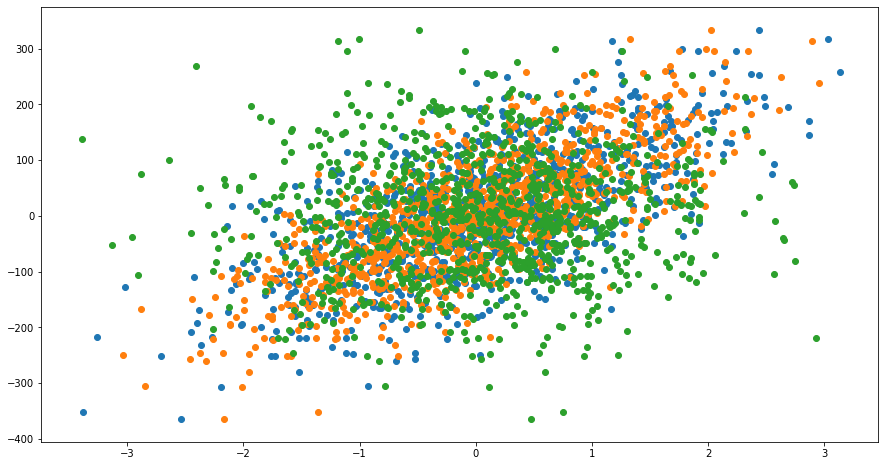

In [70]:
pl.figure(figsize=(15,8))
for i in range(3):
    pl.scatter(dff.iloc[:,i],dff["Target"])
print(x.shape)
y=y.reshape(-1,1)
print(y.shape)

In [71]:
m=np.zeros(3).reshape(-1,1)
c=0
L=0.01
reps=1000
n=1000
error=[]
d_m=[0,0,0]
d_c=0
for i in range(reps):
    y_pred=np.dot(x,m)+c
    d_m=(-2/n)*np.sum((y-y_pred)*x,axis=0).reshape(-1,1)
    d_c=(-2/n)*sum(y-y_pred)
    m=m-L*d_m
    c=c-L*d_c
    er=np.mean(np.square(y-y_pred))
    error.append(er)
print(m,c)

[[70.16297023]
 [82.33870176]
 [ 6.36548741]] [0.42474282]


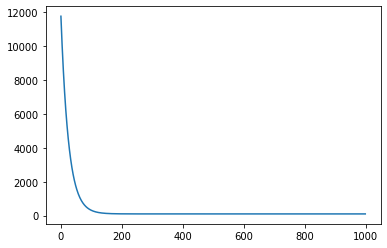

In [72]:
pl.plot(error)

<Figure size 1080x576 with 0 Axes>

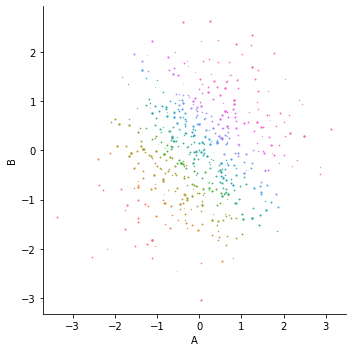

In [73]:
import seaborn as sns
x1=dff["A"]
x2=dff["B"]
x3=dff["C"]
y=dff["Target"]
y_p1=m[0]*x1.values+c
y_p2=m[1]*x2.values+c
y_p3=m[2]*x3.values+c
pl.figure(figsize=(15,8))
sns.FacetGrid(dff,hue="Target",height=5)\
        .map(pl.scatter,"A","B","C")


In [74]:
y_p1=y_p1.reshape(-1,1)
y_p2=y_p2.reshape(-1,1)
y_p3=y_p3.reshape(-1,1)


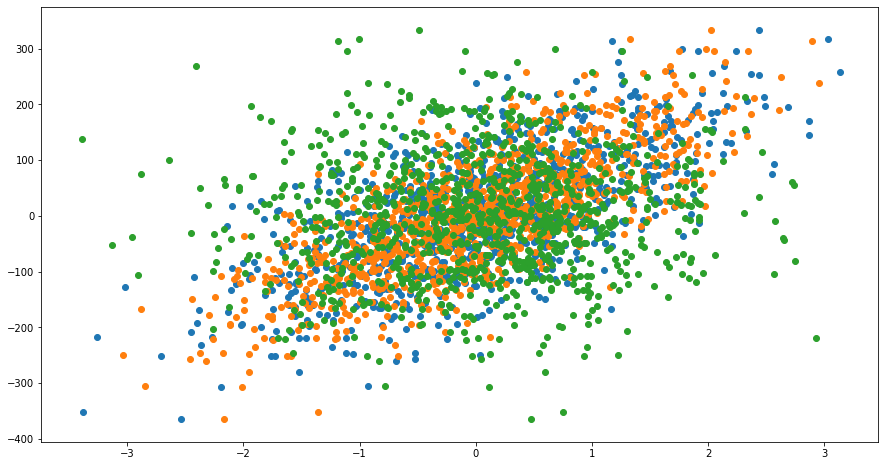

In [76]:
pl.figure(figsize=(15,8))
for i in range(3):
    pl.scatter(dff.iloc[:,i],dff["Target"])
